In [41]:
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt
from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from langdetect import detect
import string
import simplemma

### Open JSON File
Clean json data

In [2]:
with open('E:/Projects/Job analysis/data/Jobcards.json', "r") as json_file:
    cards_js = json.load(json_file)
    cards_df = pd.read_json(cards_js)
# Drop null
cards_df = cards_df.dropna()

# Replace backspaces with ""
for name in cards_df.columns:
    cards_df[name] = [a.replace("\n", "") for a in cards_df[name]]

# Select city as Location
cards_df["Location"] = [a.split()[0].replace(",", "") for a in cards_df["Location"]]

# Get info DF
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        899 non-null    object
 1   Company      899 non-null    object
 2   Location     899 non-null    object
 3   Description  899 non-null    object
dtypes: object(4)
memory usage: 35.1+ KB


In [3]:
# Quick check for "\n"
cards_df.head()

,Title,Company,Location,Description
0,Senior Consultant in Data science ...,Sia Partners,Antwerpen,"As a senior consultant in Data Science, you w..."
1,Stage - Data Science,Argenta,Antwerpen,FunctieKlaar voor een eerste leerri...
2,Data Science Engineer Healthcare ...,Robovision,Gent,Geplaatst door Willem R...
3,Data Science Software Engineer ...,OMP,Gent,"We are OMP, a game changer that opt..."
4,Junior Market Analyst (FMCG) ...,GfK,Leuven,"For over 80 years, GfK has been a r..."


### Prepare data for NLP

In [31]:
# Add language and set description to lowercase
cards_df["Language"] = [detect(a) for a in cards_df["Description"]]
cards_df["Description"] = [a.lower() for a in cards_df["Description"]]
cards_df

,Title,Company,Location,Description,Language
0,Senior Consultant in Data science ...,Sia Partners,Antwerpen,"as a senior consultant in data science, you w...",en
1,Stage - Data Science,Argenta,Antwerpen,functieklaar voor een eerste leerri...,nl
2,Data Science Engineer Healthcare ...,Robovision,Gent,geplaatst door willem r...,en
3,Data Science Software Engineer ...,OMP,Gent,"we are omp, a game changer that opt...",en
4,Junior Market Analyst (FMCG) ...,GfK,Leuven,"for over 80 years, gfk has been a r...",en
...,...,...,...,...,...
995,Finance Enterprise Partner,Roche,Brussel,a finance enterprise partner (fep) leverages ...,en
996,(Senior) Clinical Data Manager (CD...,SGS,Mechelen,"company descriptionat sgs, you can choose. fi...",en
997,Senior Clinical Project Management...,IQVIA,Antwerpen,job overviewsenior clinical project managemen...,en
998,Sales Manager Hospital Belux ...,IQVIA,Zaventem,hospital channelbuild relationship ...,en


In [124]:
# Create stopword lists
# Dutch Stop words
sw_nl = ["aan","aangaande","aangezien","achte","achter","achterna","af","afgelopen","al","aldaar","aldus","alhoewel","alias","alle","allebei","alleen","alles","als","alsnog","altijd","altoos","ander","andere","anders","anderszins","beetje","behalve","behoudens","beide","beiden","ben","beneden","bent","bepaald","betreffende","bij","bijna","bijv","binnen","binnenin","blijkbaar","blijken","boven","bovenal","bovendien","bovengenoemd","bovenstaand","bovenvermeld","buiten","bv","daar","daardoor","daarheen","daarin","daarna","daarnet","daarom","daarop","daaruit","daarvanlangs","dan","dat","de","deden","deed","der","derde","derhalve","dertig","deze","dhr","die","dikwijls","dit","doch","doe","doen","doet","door","doorgaand","drie","duizend","dus","echter","een","eens","eer","eerdat","eerder","eerlang","eerst","eerste","eigen","eigenlijk","elk","elke","en","enig","enige","enigszins","enkel","er","erdoor","erg","ergens","etc","etcetera","even","eveneens","evenwel","gauw","ge","gedurende","geen","gehad","gekund","geleden","gelijk","gemoeten","gemogen","genoeg","geweest","gewoon","gewoonweg","haar","haarzelf","had","hadden","hare","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierbeneden","hierboven","hierin","hierna","hierom","hij","hijzelf","hoe","hoewel","honderd","hun","hunne","ieder","iedere","iedereen","iemand","iets","ik","ikzelf","in","inderdaad","inmiddels","intussen","inzake","is","ja","je","jezelf","jij","jijzelf","jou","jouw","jouwe","juist","jullie","kan","klaar","kon","konden","krachtens","kun","kunnen","kunt","laatst","later","liever","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mezelf","mij","mijn","mijnent","mijner","mijzelf","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nadat","nam","namelijk","nee","neem","negen","nemen","nergens","net","niemand","niet","niets","niks","noch","nochtans","nog","nogal","nooit","nu","nv","of","ofschoon","om","omdat","omhoog","omlaag","omstreeks","omtrent","omver","ondanks","onder","ondertussen","ongeveer","ons","onszelf","onze","onzeker","ooit","ook","op","opnieuw","opzij","over","overal","overeind","overige","overigens","paar","pas","per","precies","recent","redelijk","reeds","rond","rondom","samen","sedert","sinds","sindsdien","slechts","sommige","spoedig","steeds","tamelijk","te","tegen","tegenover","tenzij","terwijl","thans","tien","tiende","tijdens","tja","toch","toe","toen","toenmaals","toenmalig","tot","totdat","tussen","twee","tweede","u","uit","uitgezonderd","uw","vaak","vaakwat","van","vanaf","vandaan","vanuit","vanwege","veel","veeleer","veertig","verder","verscheidene","verschillende","vervolgens","via","vier","vierde","vijf","vijfde","vijftig","vol","volgend","volgens","voor","vooraf","vooral","vooralsnog","voorbij","voordat","voordezen","voordien","voorheen","voorop","voorts","vooruit","vrij","vroeg","waar","waarom","waarschijnlijk","wanneer","want","waren","was","wat","we","wederom","weer","weg","wegens","weinig","wel","weldra","welk","welke","werd","werden","werder","wezen","whatever","wie","wiens","wier","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zelfs","zes","zeven","zich","zichzelf","zij","zijn","zijne","zijzelf","zo","zoals","zodat","zodra","zonder","zou","zouden","zowat","zulk","zulke","zullen","zult"]

# English stop words
sw_en = list(STOPWORDS) + ["science", "data", "apply", "job", "datum", "year", "join"]

# French stop words
sw_fr = ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]

In [125]:
# Create functions for nlp Data Cleaning

# Remove punctuations
def remove_punc(text):
    cleaned_list = [word for word in text if word not in string.punctuation]
    return "".join(cleaned_list)
   
# Remove stopwords
def remove_stopwords(word_list, lang):
    stopwords = sw_en
    if lang == "nl":
        stopwords = sw_nl
    if lang == "fr":
        stopwords = sw_fr
    return [word for word in word_list if word not in stopwords]

# Lemmatize
def lemmatize(word_list, lang):
    langdata = simplemma.load_data(lang)
    return [simplemma.lemmatize(word, langdata) for word in word_list]

In [126]:
# Clean descriptions
cards_df["Description"] = [remove_punc(desc) for desc in cards_df["Description"]]
cards_df["nlp_desc"] = [remove_stopwords(desc.split(), lang) for (desc, lang) 
                        in zip(cards_df["Description"], cards_df["Language"])]
cards_df["nlp_desc"] = [lemmatize(nlp_desc, lang) for (nlp_desc, lang) 
                        in zip(cards_df["nlp_desc"], cards_df["Language"])]

In [127]:
cards_df.head()

,Title,Company,Location,Description,Language,nlp_desc,nlp_desc_unique
0,senior consultant in data science ...,Sia Partners,Antwerpen,as a senior consultant in data science you wi...,en,"[senior, consultant, involve, transformation, ...","{great, dynamic, research, inclusion, professi..."
1,stage - data science,Argenta,Antwerpen,functieklaar voor een eerste leerri...,nl,"[functieklaar, leerrijk, werkervaring, dynamis...","{oplossing, werktijdensneakers, vanzelfspreken..."
2,data science engineer healthcare ...,Robovision,Gent,geplaatst door willem r...,en,"[geplaatst, door, willem, r, market, robovisio...","{great, kubernetes, dynamic, subject, manage, ..."
3,data science software engineer ...,OMP,Gent,we are omp a game changer that opti...,en,"[omp, game, changer, optimize, supply, chain, ...","{challenge, skillsyour, expert, yourselfintern..."
4,junior market analyst (fmcg) ...,GfK,Leuven,for over 80 years gfk has been a re...,en,"[80, year, gfk, reliable, trust, insight, part...","{great, offeran, shopper, challenge, dynamic, ..."


In [128]:
# Add column with all unique word tokens for each description
cards_df["nlp_desc_unique"] = [set(nlp_desc) for nlp_desc in cards_df["nlp_desc"]]

### Split dataframe in Data Engineers, Scientists and Analysits

In [129]:
# Titles to lowercase
cards_df["Title"] = [title.lower() for title in cards_df["Title"]]

# Data Scientist
dc_titles = [("scientist" in a) | ("science" in a)  for a in cards_df["Title"]]
dc_cards = cards_df[dc_titles]

# Data Analyst
da_titles = [("analyst" in a) for a in cards_df["Title"]]
da_cards = cards_df[da_titles]

# Data engineers
de_titles = [("engineer" in a) for a in cards_df["Title"]]
de_cards = cards_df[de_titles]

# Print amounts
print("Data Scientist jobs: " + str(dc_cards["Title"].count()) + ", Data Engineer jobs:  " + str(de_cards["Title"].count()) + ", Data Analyst jobs:  " + str(da_cards["Title"].count()))

Data Scientist jobs: 139, Data Engineer jobs:  205, Data Analyst jobs:  49


### Location analysis

<AxesSubplot:title={'center':'Data Science job locations'}, xlabel='Location'>

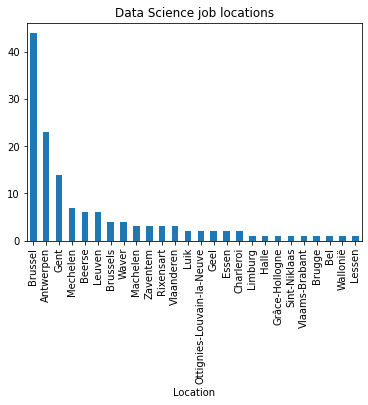

In [54]:
# Data Scientist 
dc_cards.groupby(["Location"])["Title"].count().sort_values(ascending=False).plot(kind="bar", title="Data Science job locations")

<AxesSubplot:title={'center':'Data Engineer job locations'}, xlabel='Location'>

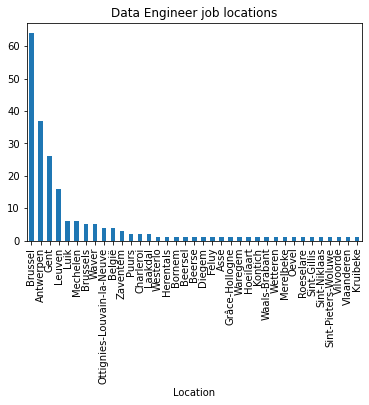

In [55]:
# Data Engineer
de_cards.groupby(["Location"])["Title"].count().sort_values(ascending=False).plot(kind="bar", title="Data Engineer job locations")

<AxesSubplot:title={'center':'Data Analyst job locations'}, xlabel='Location'>

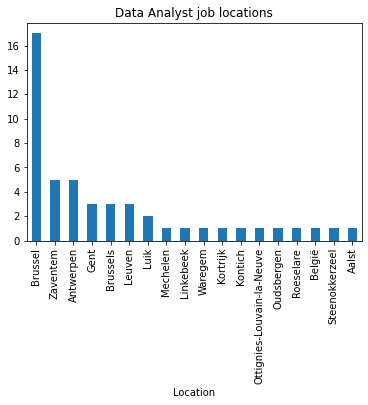

In [56]:
# Data Analyst 
da_cards.groupby(["Location"])["Title"].count().sort_values(ascending=False).plot(kind="bar", title="Data Analyst job locations")

### Create dataframe for Streamlit map

In [130]:
dc_cards.head(1)

,Title,Company,Location,Description,Language,nlp_desc,nlp_desc_unique
0,senior consultant in data science ...,Sia Partners,Antwerpen,as a senior consultant in data science you wi...,en,"[senior, consultant, involve, transformation, ...","{great, dynamic, research, inclusion, professi..."


In [131]:
cities = pd.read_csv("E:/Projects/Job analysis/data/cities_be.csv")
dc_counts = pd.DataFrame(dc_cards.groupby(["Location"])["Title"].count().sort_values(ascending=False))
dc_counts.reset_index()
dc_counts_cities = dc_counts.merge(cities, left_on="Location", right_on="city")
dc_counts_cities.head()

,Title,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,23,Antwerpen,51.2206,4.4003,Belgium,BE,Flanders,minor,920000.0,459805.0
1,14,Gent,51.0536,3.7253,Belgium,BE,Flanders,minor,262219.0,262219.0
2,7,Mechelen,51.0281,4.4803,Belgium,BE,Flanders,minor,86921.0,86921.0
3,6,Leuven,50.8791,4.7009,Belgium,BE,Flanders,minor,NaN,NaN
4,4,Brussels,50.8333,4.3333,Belgium,BE,Brussels-Capital Region,primary,1743000.0,1019022.0


### Most frequent unique word counts in each job type

In [132]:
# Data Science

# Create 1 list of all unique words in english
dc_cards_en = dc_cards[dc_cards["Language"] == "en"]
dc_desc_list = [] 
dc_desc_list = [word for unique in dc_cards_en["nlp_desc_unique"] for word in list(unique)]
dc_freq = pd.DataFrame(dc_desc_list).value_counts()

<AxesSubplot:ylabel='0'>

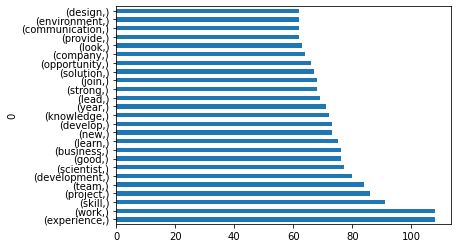

In [134]:
dc_freq[0:25].plot(kind="barh")
# Clearly some words need to be put together as 1 word and simplified 
# (ex: "machine learning", "project and projects")